In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from linear_model import LinearClassifier
from sklearn.linear_model import SGDClassifier

In [2]:
data = pd.read_csv('dataset\citrus.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [3]:
data.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [4]:
scaler = MinMaxScaler()
le = LabelEncoder()

df = data.copy()

colors = ['red', 'green', 'blue']
numerical = ['diameter', 'weight']
target = 'name'

names = pd.unique(data[target])

df[colors] /= 255
df[numerical] = scaler.fit_transform(data[numerical])
df[target] = le.fit_transform(data[target]) * 2 - 1

print(names)
df.head()

['orange' 'grapefruit']


,name,diameter,weight,red,green,blue
0,1,0.000000,0.000000,0.674510,0.333333,0.007843
1,1,0.070423,0.007382,0.650980,0.305882,0.011765
2,1,0.108228,0.048126,0.611765,0.317647,0.007843
3,1,0.111935,0.050587,0.639216,0.317647,0.015686
4,1,0.112676,0.051502,0.631373,0.282353,0.035294


In [5]:
X = df.drop(columns=target)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

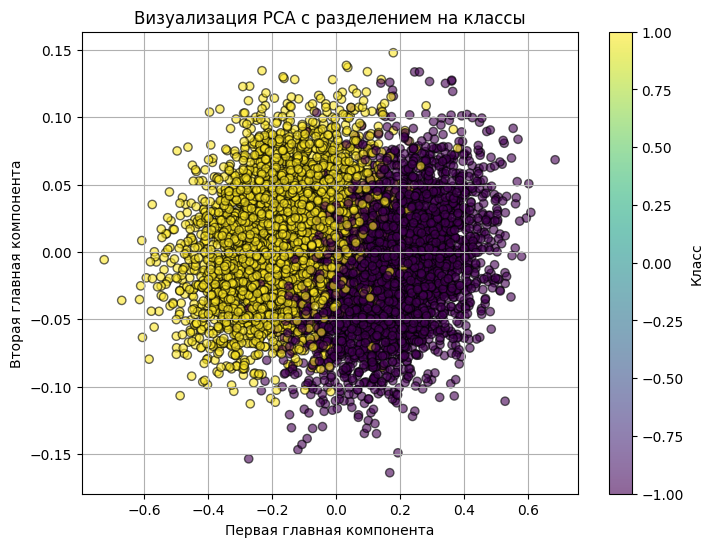

In [7]:
pca = PCA(n_components=2)

components = pca.fit_transform(X_train, y_train)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    components[:, 0],  # Первая главная компонента
    components[:, 1],  # Вторая главная компонента
    c=y_train,  # Цвет определяется метками классов
    cmap='viridis',  # Цветовая карта
    edgecolor='k',
    alpha=0.6
)

# Добавление цветной легенды
plt.colorbar(scatter, label="Класс")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.title("Визуализация PCA с разделением на классы")
plt.grid(True)
plt.show()

In [8]:
def plot_training_history(history):
    """
    Построить график обучения по истории метрик.

    Parameters
    ----------
    history : dict
        Словарь c ключами 'loss' и 'metric', содержащий значения потерь и метрик по эпохам.
    """
    epochs = range(1, len(history['loss']) + 1)
    
    plt.figure(figsize=(12, 6))
    
    # График потерь
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['loss'], label='Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()

    # График метрики
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['Q'], label='Q')
    plt.title('Quality functional')
    plt.xlabel('Epochs')
    plt.ylabel('Q')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_margin(margins):
    margins = np.sort(margins.flatten())
    plt.plot(margins, c='k', linewidth=3)

    plt.axhline(y=0, c='k', linewidth=0.35)

    x = np.arange(len(margins))
    plt.gca().fill_between(x, margins, where=(margins>=0.2), color='#00ff00')
    plt.gca().fill_between(x, margins, where=(margins<=-0.2), color='#ff0000')
    plt.gca().fill_between(x, margins, where=np.bitwise_and(margins >= -0.2, margins <= 0.2), color='#ffff00')

    plt.ylabel("Margin")
    plt.gcf().set_size_inches(9, 6)

Epoch   0 | loss = 15.932248 | Q = 0.505775
Epoch   1 | loss = 19.514851 | Q = 0.695866
Epoch   2 | loss = 8.927488 | Q = 0.778182
Epoch   3 | loss = 2.063390 | Q = 0.791034
Epoch   4 | loss = 1.104163 | Q = 0.794165
Epoch   5 | loss = 3.279596 | Q = 0.819019
Epoch   6 | loss = 2.108765 | Q = 0.831917
Epoch   7 | loss = 0.495423 | Q = 0.828552
Epoch   8 | loss = 0.097091 | Q = 0.821237
Epoch   9 | loss = 0.144972 | Q = 0.814475
Epoch  10 | loss = 0.232414 | Q = 0.808654
Epoch  11 | loss = 0.130430 | Q = 0.801872
Epoch  12 | loss = 0.213655 | Q = 0.795990
Epoch  13 | loss = 0.117357 | Q = 0.789203
Epoch  14 | loss = 0.087027 | Q = 0.782182
Epoch  15 | loss = 0.046118 | Q = 0.774821
Epoch  16 | loss = 0.127967 | Q = 0.768352
Epoch  17 | loss = 0.049754 | Q = 0.761166
Epoch  18 | loss = 0.118753 | Q = 0.754742
Epoch  19 | loss = 0.168843 | Q = 0.748883
Epoch  20 | loss = 0.098575 | Q = 0.742380
Epoch  21 | loss = 0.039057 | Q = 0.735347
Epoch  22 | loss = 0.065389 | Q = 0.728647
Epoch  23

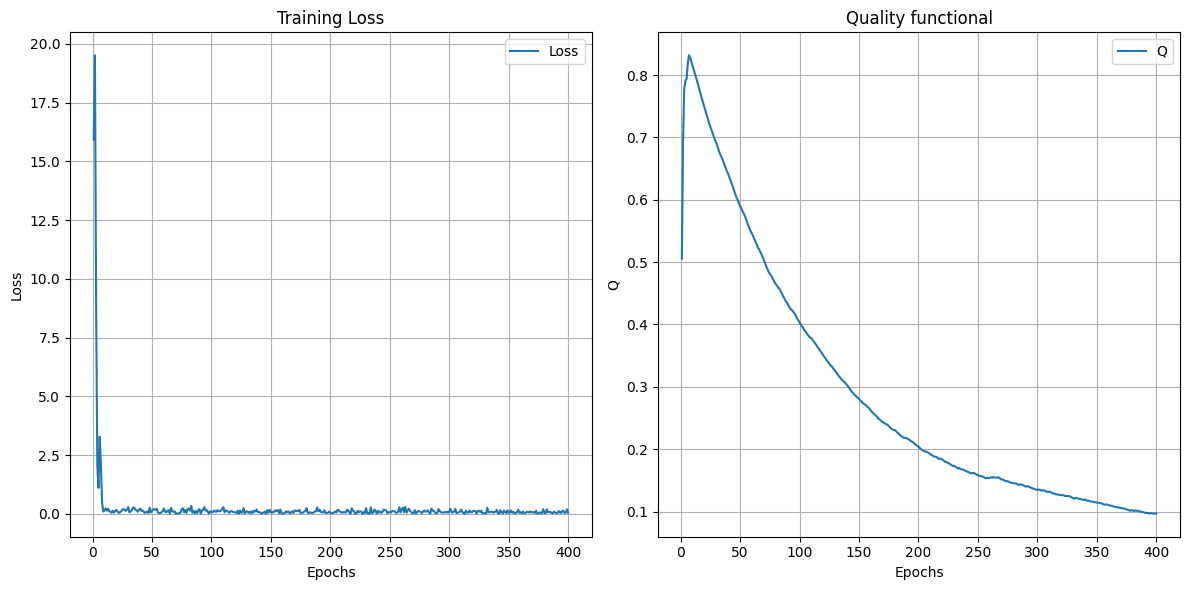

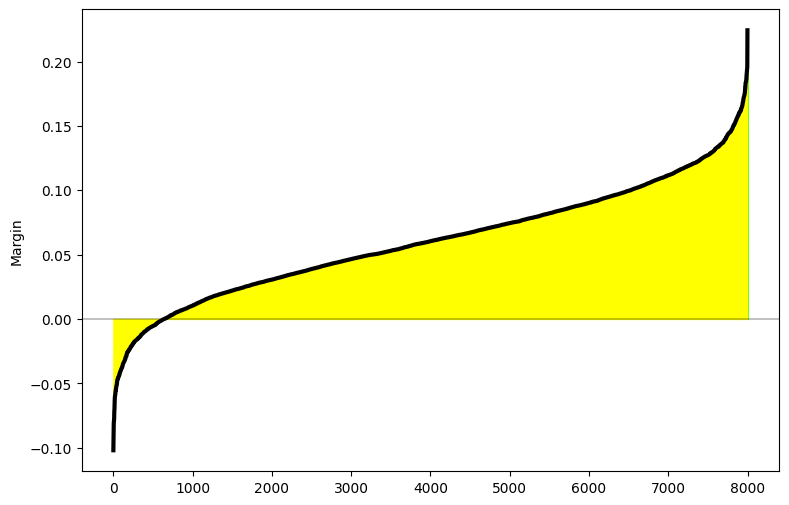

In [9]:
clf_xavier = LinearClassifier(
    units_out=1, 
    initializer='glorot', 
    regularizer=True, 
    lr_mode='fast',
    optimizer='nag'
    )
clf_xavier.fit(X_train, y_train, epochs=400, lr=1e-5, reg_c=0.00002)
plot_training_history(clf_xavier.history)
plot_margin(clf_xavier._calc_margin(X_train, y_train, clf_xavier.w, clf_xavier.b))

Epoch   0 | loss = 0.000996 | Q = 0.000032
Epoch   1 | loss = 1.104162 | Q = 0.011073
Epoch   2 | loss = 2.495929 | Q = 0.035921
Epoch   3 | loss = 1.422246 | Q = 0.049785
Epoch   4 | loss = 0.621778 | Q = 0.055505
Epoch   5 | loss = 0.824616 | Q = 0.063196
Epoch   6 | loss = 0.128465 | Q = 0.063848
Epoch   7 | loss = 0.035931 | Q = 0.063569
Epoch   8 | loss = 0.024938 | Q = 0.063183
Epoch   9 | loss = 0.015183 | Q = 0.062703
Epoch  10 | loss = 0.118435 | Q = 0.063260
Epoch  11 | loss = 0.016452 | Q = 0.062792
Epoch  12 | loss = 0.187604 | Q = 0.064040
Epoch  13 | loss = 0.086884 | Q = 0.064269
Epoch  14 | loss = 0.010798 | Q = 0.063734
Epoch  15 | loss = 0.072070 | Q = 0.063817
Epoch  16 | loss = 0.078218 | Q = 0.063961
Epoch  17 | loss = 0.179060 | Q = 0.065112
Epoch  18 | loss = 0.066621 | Q = 0.065127
Epoch  19 | loss = 0.138502 | Q = 0.065861
Epoch  20 | loss = 0.114133 | Q = 0.066344
Epoch  21 | loss = 0.073020 | Q = 0.066411
Epoch  22 | loss = 0.047216 | Q = 0.066219
Epoch  23 |

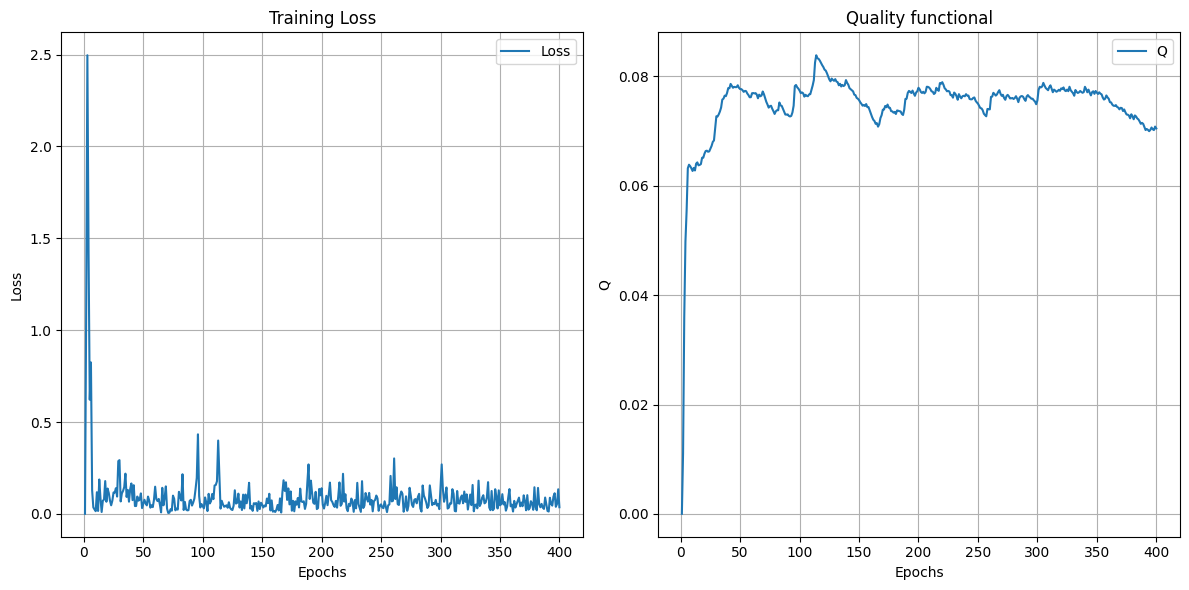

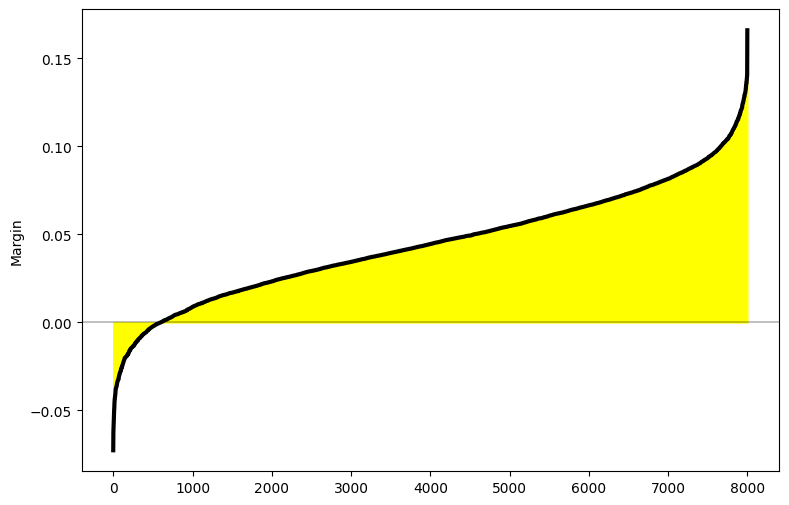

In [10]:
clf_random = LinearClassifier(
    units_out=1, 
    initializer='random', 
    regularizer=True, 
    lr_mode='fast',
    optimizer='nag'
    )
clf_random.fit(X_train, y_train, epochs=400, lr=1e-6, reg_c=1e-3)
plot_training_history(clf_random.history)
plot_margin(clf_random._calc_margin(X_train, y_train, clf_random.w, clf_random.b))

Epoch   0 | loss = 0.000000 | Q = 0.000000
Epoch   1 | loss = 2.301606 | Q = 0.023016
Epoch   2 | loss = 1.708602 | Q = 0.039872
Epoch   3 | loss = 0.924916 | Q = 0.048722
Epoch   4 | loss = 0.985014 | Q = 0.058085
Epoch   5 | loss = 0.102224 | Q = 0.058527
Epoch   6 | loss = 0.103702 | Q = 0.058978
Epoch   7 | loss = 0.196580 | Q = 0.060354
Epoch   8 | loss = 0.465213 | Q = 0.064403
Epoch   9 | loss = 0.403519 | Q = 0.067794
Epoch  10 | loss = 0.232072 | Q = 0.069437
Epoch  11 | loss = 0.151561 | Q = 0.070258
Epoch  12 | loss = 0.030697 | Q = 0.069863
Epoch  13 | loss = 0.081840 | Q = 0.069982
Epoch  14 | loss = 0.070491 | Q = 0.069987
Epoch  15 | loss = 0.123801 | Q = 0.070526
Epoch  16 | loss = 0.078631 | Q = 0.070607
Epoch  17 | loss = 0.043965 | Q = 0.070340
Epoch  18 | loss = 0.094843 | Q = 0.070585
Epoch  19 | loss = 0.167472 | Q = 0.071554
Epoch  20 | loss = 0.006382 | Q = 0.070902
Epoch  21 | loss = 0.125570 | Q = 0.071449
Epoch  22 | loss = 0.051951 | Q = 0.071254
Epoch  23 |

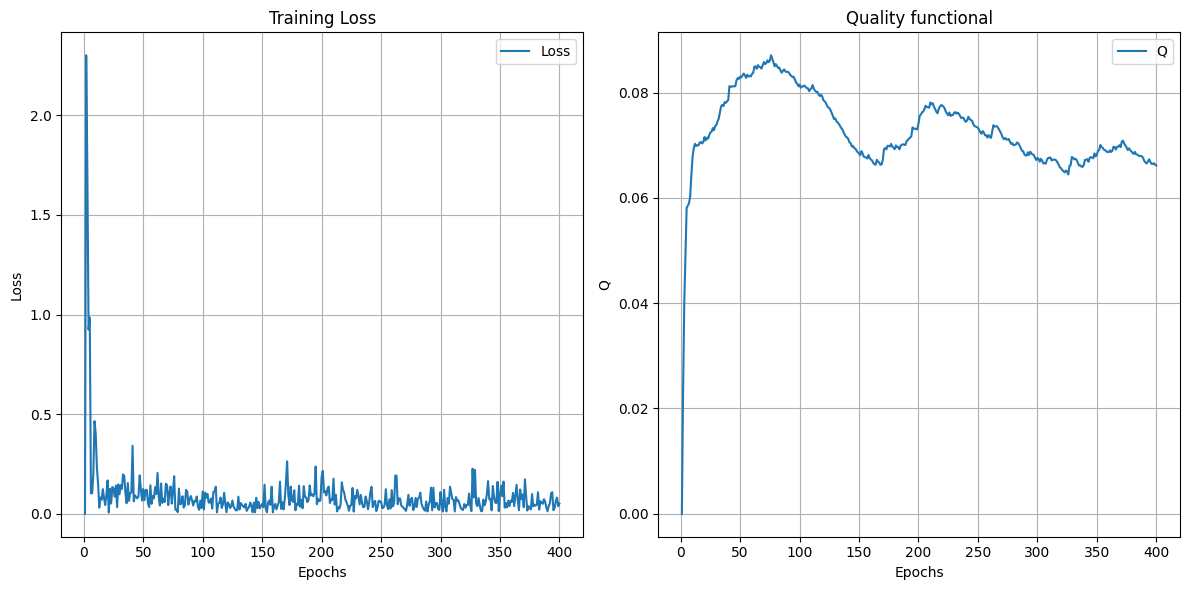

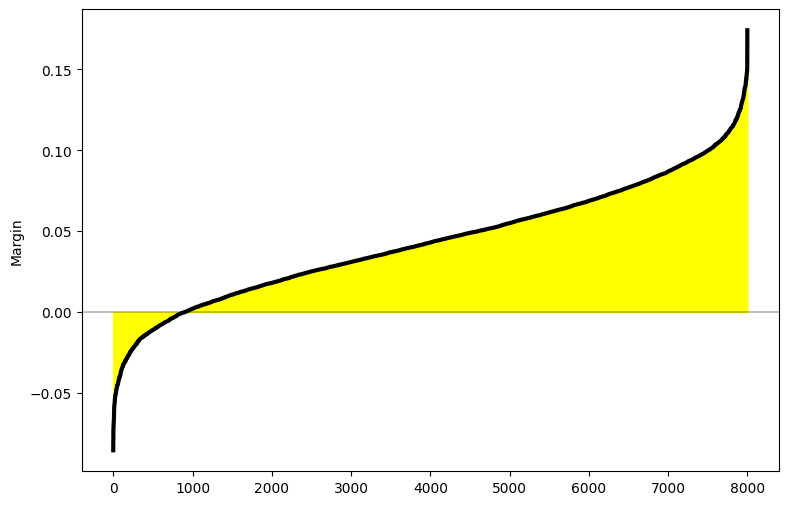

In [11]:
clf_zeros = LinearClassifier(
    units_out=1, 
    initializer='zeros', 
    regularizer=True, 
    lr_mode='fast',
    optimizer='nag'
    )
clf_zeros.fit(X_train, y_train, epochs=400, lr=5e-6, reg_c=1e-3)
plot_training_history(clf_zeros.history)
plot_margin(clf_zeros._calc_margin(X_train, y_train, clf_zeros.w, clf_zeros.b))

In [12]:
cls_sklearn = SGDClassifier(penalty='l2')
cls_sklearn.fit(X_train, y_train)

c:\Users\Loassar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier()

In [13]:
y_pred_xavier = clf_xavier.predict(X_test)
y_pred_random = clf_random.predict(X_test)
y_pred_zeros = clf_zeros.predict(X_test)
y_pred_sklearn = cls_sklearn.predict(X_test)

In [14]:
# 3. Вычисление и вывод метрик
def print_metrics(y_true, y_pred, model_name):
    print(f"\nMetrics for model: {model_name}")
    print("-" * 40)
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred, labels=(1, -1), target_names=names))

# Вывод метрик
print_metrics(y_test, y_pred_xavier, "Custom Linear Classifier with Xavier initialization")
print_metrics(y_test, y_pred_random, "Custom Linear Classifier with random initialization")
print_metrics(y_test, y_pred_zeros, "Custom Linear Classifier with zeros initialization")
print_metrics(y_test, y_pred_sklearn, "Sklearn Linear Classifier with l2")



Metrics for model: Custom Linear Classifier with Xavier initialization
----------------------------------------
Accuracy: 0.9270
Classification Report:
              precision    recall  f1-score   support

      orange       0.94      0.91      0.92       977
  grapefruit       0.91      0.95      0.93      1023

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000


Metrics for model: Custom Linear Classifier with random initialization
----------------------------------------
Accuracy: 0.9310
Classification Report:
              precision    recall  f1-score   support

      orange       0.96      0.90      0.93       977
  grapefruit       0.91      0.96      0.93      1023

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000


Metrics for model: Custom Linear Classi